# Exxon Mobil Corporation

### Stock prediction with deep learning

<br/> Gytis Kazlauskis KT-8/2
<br/> email: gytis.ka8869@gmail.com

<img src="http://jumpvine.net/wp-content/uploads/Steps-to-Creating-Company-Culture-e1508926692787.jpg" width="800" align="left"/>


<br/><b>1. Data loading and pre-processing</b>
<br/>1.1 Importing the main libraries
<br/>1.2 Importing the dataset
<br/>1.3 Feature scaling
<br/>1.4 Splitting the training set to dependent and independent variables
<br/>1.5 Reshaping the matrix
<br/><b>2. Building the RNN</b>
<br/>2.1 RNN initialization
<br/>2.2 Adding the first layer
<br/>2.3 Adding 5 more layers
<br/>2.4 Adding the output layer & compiling
<br/><b>3. Train and deploy the RNN</b>
<br/>3.1 Fit the RNN to the Training set
<br/>3.2 Computing Predictions
<br/>3.3 Result visualization


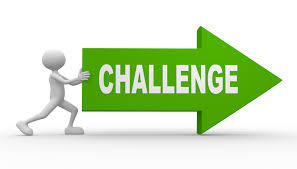

Given a 10-year history of the Exxon Mobil prices predict the stock values for the period of the recent most month that are not included in the historical data.

## Data loading and pre-processing

### Importing the main libraries

- [Numpy](http://www.numpy.org): library for the Python programming language
- [matplotlib](https://matplotlib.org): a plotting library for the Python programming language and its numerical mathematics extension NumPy.
- [pandas](https://pandas.pydata.org): software library written for the Python programming language for data manipulation and analysis.

In [1]:
# importing the 3 main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import the dataset

Dataset description: the open high, low and close values of the Exxon Mobil from August 1st 2009 to July 31st 2019.


In [2]:
#importing the dataset

# load the file contents 
dataset_train = pd.read_csv('dataset_train.csv')

In [3]:
# Displaying the head of the trainset
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-08-03,70.959999,71.400002,70.300003,70.650002,51.141487,24756800
1,2009-08-04,70.250000,70.639999,70.000000,70.599998,51.105297,18612000
2,2009-08-05,70.480003,70.489998,69.610001,70.029999,50.692692,20348800
3,2009-08-06,70.010002,70.029999,69.410004,69.730003,50.475525,17369900
4,2009-08-07,70.010002,70.389999,69.349998,69.470001,50.287315,18041800


In [4]:
# Created a subtable of relevant entries (open values)
training_set = dataset_train.iloc[:, 1:2].values 

In [5]:
# Displaying the training_set array
training_set

array([[70.959999],
       [70.25    ],
       [70.480003],
       ...,
       [74.879997],
       [75.059998],
       [75.040001]])

### Feature Scaling

The next step is to rescale our data to the range from 0 to 1 using the min-max normalization

In [6]:
# Feature Scaling

# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [7]:
# create a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [8]:
# create the actual training set of scaled values
training_set_scaled = sc.fit_transform(training_set)

In [9]:
# Displaying the training_set_scaled
training_set_scaled

array([[0.29661554],
       [0.28169018],
       [0.28652523],
       ...,
       [0.37902037],
       [0.38280429],
       [0.38238392]])

### Splitting the training set to dependent and independent variables
Importing data from different sources is fundamental to data science and machine learning. The abundance of good quality data not only eliminates a lot of pre-processing steps but also determines how likely your model is going to succeed in predicting plausible outcomes.

In [10]:
# History term 90 days
# This data structure will be filled with data from last 90 days before today.
X_train = [] 

In [11]:
# Displaying the ammount of rows and cells of the scaled training set
training_set_scaled.shape

(2516, 1)

In [12]:
# the stock price today
y_train = [] 

In [13]:
# we start from day 90 because that is the first instance allowing us to 
# go back 90 days
for i in range(90, 2516):    
    # put the last 90 days values in one row of X_train
    X_train.append(training_set_scaled[i-90:i, 0]) 
    y_train.append(training_set_scaled[i, 0])


In [14]:
# Turning X_train & y_train into numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [15]:
# Displaying X_train
X_train

array([[0.29661554, 0.28169018, 0.28652523, ..., 0.39604801, 0.35947023,
        0.34937992],
       [0.28169018, 0.28652523, 0.27664503, ..., 0.35947023, 0.34937992,
        0.33949973],
       [0.28652523, 0.27664503, 0.27664503, ..., 0.34937992, 0.33949973,
        0.34622666],
       ...,
       [0.50241753, 0.50367879, 0.51250799, ..., 0.38974145, 0.3979399 ,
        0.37881028],
       [0.50367879, 0.51250799, 0.48665129, ..., 0.3979399 , 0.37881028,
        0.37902037],
       [0.51250799, 0.48665129, 0.49358848, ..., 0.37881028, 0.37902037,
        0.38280429]])

### Reshaping the Matrix

A new matrix dimension is needed to accommodate the indicator (predictor). 

<img src="http://blog.iseesystems.com/wp-content/uploads/2009/07/cube-matrix.jpg" width="500" align="left"/>

In [16]:
# Reshaping the data matrix, we retain the 2 original dimensions and add a third of depth=1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

### RNN initialization

- Import the sequential model from the Keras API;
- Import the Dense layer template from the Keras API;
- Import the LSTM model from the Keras API
- Create an instance of the sequential model called regressor because we want to predict a continuous value

In [17]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [18]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

### Adding the first layer

<br/>We first add an object of the LSTM /class! 
<br/><b>Specifications:</b>
<br/>100 neurons
<br/>return requences = true
<br/>input shape : 3D
<br/>dropout rate = 20%

In [19]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 100, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
# the argument is the dropout rate to ignore in the layers (20%), 
# i.e. 50 units * 20% = 10 units will be dropped each time
regressor.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add More Layers

Adding 5 more layers, with 100 neurons and the dropout rate of 20%


In [21]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [23]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [24]:
# Adding a fifth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
# Adding a sixth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

### Add Output Layer & Compile

The output has 1 dimension , i.e. one value to be predicted thus or output fully connected layer has dimensionality = 1.

- **Optimizer**: adam
- **Loss function**: regression problems take the mean square error as most common

In [26]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [27]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train and deploy the RNN

### Fitting the RNN to the Training set

RNN is being trained using the data from **Training Set X** and **predictors in y**.
<br/>100 iterations will be used

In [28]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
2426/2426 [==============================] - 166s 68ms/step - loss: 0.0317
Epoch 2/100
2426/2426 [==============================] - 154s 64ms/step - loss: 0.0070
Epoch 3/100
2426/2426 [==============================] - 143s 59ms/step - loss: 0.0070
Epoch 4/100
2426/2426 [==============================] - 144s 59ms/step - loss: 0.0051
Epoch 5/100
2426/2426 [==============================] - 145s 60ms/step - loss: 0.0047
Epoch 6/100
2426/2426 [==============================] - 147s 60ms/step - loss: 0.0046
Epoch 7/100
2426/2426 [==============================] - 147s 61ms/step - loss: 0.0043
Epoch 8/100
2426/2426 [==============================] - 148s 61ms/step - loss: 0.0042
Epoch 9/100
2426/2426 [==============================] - 146s 60ms/step - loss: 0.0035
Epoch 10/100
2426/2426 [==============================] - 145s 60ms/step - loss: 0.0038
Epoch 11/100
2426/2426 [==============================] - 148s 61ms/step - loss: 

2426/2426 [==============================] - 155s 64ms/step - loss: 9.5637e-04
Epoch 91/100
2426/2426 [==============================] - 134s 55ms/step - loss: 8.4258e-04
Epoch 92/100
2426/2426 [==============================] - 141s 58ms/step - loss: 9.8617e-04
Epoch 93/100
2426/2426 [==============================] - 144s 59ms/step - loss: 9.7200e-04
Epoch 94/100
2426/2426 [==============================] - 138s 57ms/step - loss: 9.2764e-04
Epoch 95/100
2426/2426 [==============================] - 136s 56ms/step - loss: 8.6807e-04
Epoch 96/100
2426/2426 [==============================] - 151s 62ms/step - loss: 8.2170e-04
Epoch 97/100
2426/2426 [==============================] - 172s 71ms/step - loss: 0.0010
Epoch 98/100
2426/2426 [==============================] - 145s 60ms/step - loss: 9.0207e-04
Epoch 99/100
2426/2426 [==============================] - 139s 57ms/step - loss: 8.4542e-04
Epoch 100/100
2426/2426 [==============================] - 143s 59ms/step - loss: 8.5960e-04


### Computing Predictions

Created a data-frame by importing the Exxon Stock Price Test set for August 2019 using pandas and made it into a numpy array.


In [51]:
# Getting the real stock price for August 1st 2019 

dataset_test = pd.read_csv('dataset_test.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,73.739998,74.269997,72.269997,72.459999,71.570107,17132800
1,2019-08-02,72.610001,73.260002,71.180000,71.750000,70.868828,21376700
2,2019-08-05,70.779999,70.919998,69.610001,70.279999,69.416878,19080900
3,2019-08-06,70.290001,71.010002,70.279999,70.959999,70.088524,12282400
4,2019-08-07,69.860001,70.879997,69.400002,70.500000,69.634178,15231100
5,2019-08-08,70.849998,72.410004,70.620003,72.379997,71.491089,14304100
6,2019-08-09,72.129997,72.250000,70.470001,70.839996,69.970001,13686600
7,2019-08-12,70.059998,70.160004,69.330002,69.629997,69.629997,8668400
8,2019-08-13,69.269997,70.620003,68.919998,70.489998,70.489998,12403300
9,2019-08-14,69.070000,69.089996,67.650002,67.650002,67.650002,18114400


In [52]:
# selecting 2nd column of data frame with all rows
# Displaying the amount of rows in the real_stock_price array
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

22

In [53]:
# Displaying all the content in the real_stock_price array
real_stock_price

array([[73.739998],
       [72.610001],
       [70.779999],
       [70.290001],
       [69.860001],
       [70.849998],
       [72.129997],
       [70.059998],
       [69.269997],
       [69.07    ],
       [67.459999],
       [67.779999],
       [68.970001],
       [69.300003],
       [69.959999],
       [69.910004],
       [68.82    ],
       [68.120003],
       [68.129997],
       [67.529999],
       [68.300003],
       [68.610001]])

In [54]:
# Getting the predicted stock price of 2019

# axis = 0 means concatenate the lines (i.e. vertical axis)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [55]:
# Displaying the amount of rows in the dataset_total array
dataset_total.size


2538

In [56]:
# the difference in the length of the first two gives us 
# the first day in 2019, and we need to go back 90 days to get the necessary range
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

In [57]:
# Displaying the amount of rows in the inputs array
inputs.size

112

In [58]:
# Reshaping the inputs array
inputs = inputs.reshape(-1,1) 

# apply the feature scaler
inputs = sc.transform(inputs)

1. For each price in August 2019 we need the **immediate 90 values** before it. 
2. We have 22 prices in August;
3. We need a numpy 3D array of 90 prices (columns) times 22 days (rows) times 1 dependent variable 

In [59]:
# Getting the predicted stock price of 2019 August
X_test = []

In [60]:
# the first 90 from inputs are from training set; start 
# from 90 and get the extra 22, i.e. up to 112
for i in range(90, 112): 
    X_test.append(inputs[i-90:i, 0])


In [61]:
# Turning X_test into a numpy array
X_test = np.array(X_test) # not 3D structure yet

In [62]:
# create a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [63]:
# The task to predict a dependent variable value (y) based on a given independent variable (x) is given
predicted_stock_price = regressor.predict(X_test)

In [64]:
# need to inverse the scaling to get meaningful predicted stock price # outputs
# displaying the amount of rows in the predicted_stock_price array
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

22

### Result Visualization


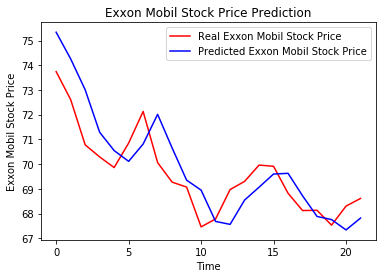

In [65]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Exxon Mobil Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Exxon Mobil Stock Price')

plt.title('Exxon Mobil Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Exxon Mobil Stock Price')
plt.legend()

plt.show()

The blue line shows the trend of the stock for the month of August 2019. 

Some observations:
- The prediction is a bit delayed (by a few days)
- If you don't mind the delay, the prediction is pretty accurate

### Compute the RMSE

If we need to compute the RMSE for our Stock Price Prediction problem, we use the real stock price and predicted stock price as shown.

Then consider dividing this RMSE by the range of the Exxon Mobil Stock Price values of August 2019 to get a relative error, as opposed to an absolute error. 


In [66]:
#import the libraries
import math
from sklearn.metrics import mean_squared_error

In [67]:
rmse = math.sqrt( mean_squared_error( real_stock_price[0:22,:], predicted_stock_price))
rmse

1.1307706463511715

### Conclusion


All in all, this little project I've done was an interesting experience. Even though, the results weren't as good as I wanted them to be(should've tinkered more with the LSTMs and the amount of neurons in them, but was hard to do, due to long wait times), I still think that this experience will help me in my future career.